## Visualization for Dask Expiriment Data
https://arxiv.org/pdf/1711.00489.pdf

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [13]:
os.getcwd()

'/home/ubuntu/adadamp-experiments/exp-dask'

In [19]:
def plot(stats, labels, x_lbl, y_lbl, x_title, y_title, title, scale='linear'):
    # get data
    for stat in stats:
        stat["training_time"] = stat["partial_fit__time"].cumsum()

    ax = stats[0].plot(x=x_lbl, y=y_lbl)
    for idx in range(1, len(stats)):
        stats[idx].plot(ax=ax, x=x_lbl, y=y_lbl)
    ax.set_xlim(0, None)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    ax.set_yscale(scale)
    ax.legend(labels)
    ax.grid()
    return ax

In [28]:
dec_lr_1_file = './sim-results/dec-lr-1-machine/results-final.csv'
large_bs1_1_file = './sim-results/large-bs1-1-machine/results-final.csv'

dec_lr_1 = pd.read_csv(dec_lr_1_file)
large_bs1_1 = pd.read_csv(large_bs1_1_file)

In [33]:
stats = [dec_lr_1, large_bs1_1]
labels = ['Dec LR - 1 Machine', 'Large BS (m=.9) - 1 Machine']

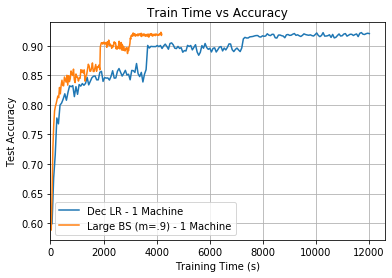

In [34]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='training_time', 
    y_lbl='score__acc', 
    x_title='Training Time (s)', 
    y_title='Test Accuracy', 
    title='Train Time vs Accuracy', 
    scale='linear',
)

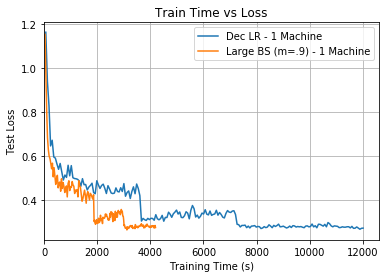

In [35]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='training_time', 
    y_lbl='score__loss', 
    x_title='Training Time (s)', 
    y_title='Test Loss', 
    title='Train Time vs Loss', 
    scale='linear',
)

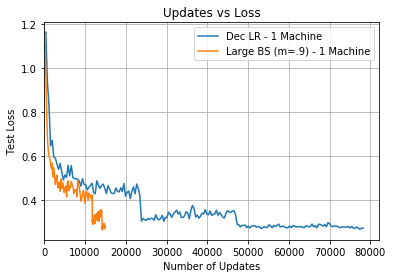

In [38]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='n_updates', 
    y_lbl='score__loss', 
    x_title='Number of Updates', 
    y_title='Test Loss', 
    title='Updates vs Loss', 
    scale='linear',
)

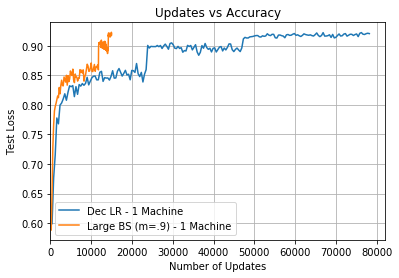

In [42]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='n_updates', 
    y_lbl='score__acc', 
    x_title='Number of Updates', 
    y_title='Test Loss', 
    title='Updates vs Accuracy', 
    scale='linear',
)

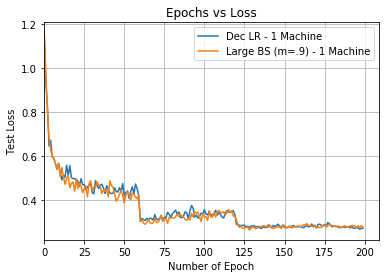

In [44]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='epoch', 
    y_lbl='score__loss', 
    x_title='Number of Epoch', 
    y_title='Test Loss', 
    title='Epochs vs Loss', 
    scale='linear',
)

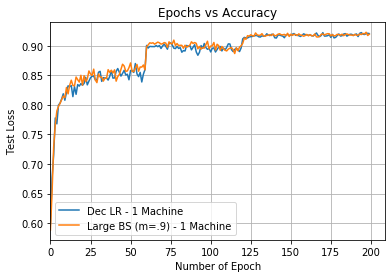

In [43]:
ax = plot(
    stats=stats,
    labels=labels,
    x_lbl='epoch', 
    y_lbl='score__acc', 
    x_title='Number of Epoch', 
    y_title='Test Loss', 
    title='Epochs vs Accuracy', 
    scale='linear',
)